In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [73]:
# Loading The Training Dataset
# The Google training data has information from 3 Jan 2012 to 30 Dec 2016. 

df_train= pd.read_csv("Google_train_data.csv")
df_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [75]:
df_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [76]:
df_train["Close"]=pd.to_numeric(df_train.Close,errors='coerce')
data = df_train.dropna()
trainData = df_train.iloc[:,4:5].values

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1258 non-null   object 
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [78]:
# Use the Open Stock Price Column to Train the Model.

sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1258, 1)

In [79]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [80]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [81]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [82]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 32s - loss: nan - 32s/epoch - 920ms/step
Epoch 2/20
35/35 - 13s - loss: nan - 13s/epoch - 369ms/step
Epoch 3/20
35/35 - 13s - loss: nan - 13s/epoch - 362ms/step
Epoch 4/20
35/35 - 12s - loss: nan - 12s/epoch - 345ms/step
Epoch 5/20
35/35 - 13s - loss: nan - 13s/epoch - 363ms/step
Epoch 6/20
35/35 - 13s - loss: nan - 13s/epoch - 359ms/step
Epoch 7/20
35/35 - 12s - loss: nan - 12s/epoch - 351ms/step
Epoch 8/20
35/35 - 12s - loss: nan - 12s/epoch - 355ms/step
Epoch 9/20
35/35 - 13s - loss: nan - 13s/epoch - 364ms/step
Epoch 10/20
35/35 - 13s - loss: nan - 13s/epoch - 357ms/step
Epoch 11/20
35/35 - 13s - loss: nan - 13s/epoch - 362ms/step
Epoch 12/20
35/35 - 13s - loss: nan - 13s/epoch - 358ms/step
Epoch 13/20
35/35 - 13s - loss: nan - 13s/epoch - 358ms/step
Epoch 14/20
35/35 - 13s - loss: nan - 13s/epoch - 361ms/step
Epoch 15/20
35/35 - 12s - loss: nan - 12s/epoch - 347ms/step
Epoch 16/20
35/35 - 13s - loss: nan - 13s/epoch - 364ms/step
Epoch 17/20
35/35 - 13s - loss: n

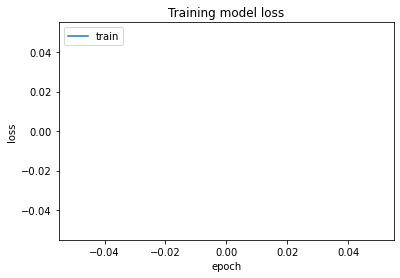

In [83]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [84]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [85]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 4s 125ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [57]:
predicted_price = sc.inverse_transform(y_pred)

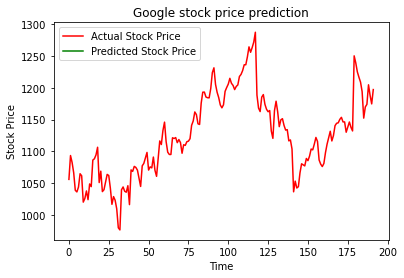

In [58]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
38/38 [==============================] - 26s 203ms/step - loss: 0.0402
Epoch 2/100
38/38 [==============================] - 8s 214ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 8s 213ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 8s 205ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 8s 222ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0040
Epoch 13/100

38/38 [==============================] - 8s 215ms/step - loss: 0.0016
Epoch 100/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0014


In [37]:
# Extracting the Actual Stock Prices of Jan-2017.

df_test=pd.read_csv('Google_test_data.csv')
actual_stock_price=df_test.iloc[:,1:2].values

In [38]:
# Preparing the Input for the Model.

dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = dataset_total[len(df_train)- len(df_test)- 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [39]:
# Predicting the Values for Jan 2017 Stock Prices.
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


In [40]:
predicted_stock_price

array([[765.9829 ],
       [761.67474],
       [754.30475],
       [745.3003 ],
       [738.3328 ],
       [735.23016],
       [732.2215 ],
       [730.24286],
       [731.2645 ],
       [728.5435 ],
       [720.6027 ],
       [713.8251 ],
       [707.6817 ],
       [705.6407 ],
       [711.0851 ],
       [719.3502 ],
       [723.4338 ],
       [722.83435],
       [721.7008 ],
       [723.2552 ]], dtype=float32)

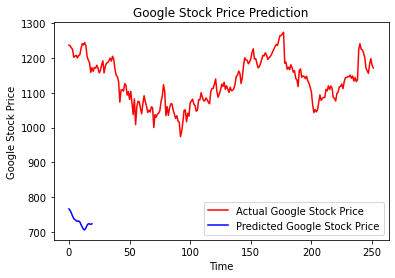

In [53]:
# Plotting the Actual and Predicted Prices for Google Stocks.

plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()